# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [7]:
# Import warning

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Import the libraries you will be using for analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.3.5
pandas version: 2.3.3
matplotlib version: 3.10.6
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [12]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [7]:
df = pd.read_parquet("C:\\Users\\hp\\Downloads\\Datasets and Dictionary-NYC\Datasets and Dictionary\\trip_records\\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [8]:
import os
BASE_PATH =r"C:\\Users\hp\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records"
os.chdir(BASE_PATH)
print(os.getcwd())

C:\Users\hp\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records


In [9]:
parquet_files = [
    "2023-1.parquet",
    "2023-2.parquet",
    "2023-3.parquet",
    "2023-4.parquet",
    "2023-5.parquet",
    "2023-6.parquet",
    "2023-7.parquet",
    "2023-8.parquet",
    "2023-9.parquet",
    "2023-10.parquet",
    "2023-11.parquet",
    "2023-12.parquet"
]

In [10]:
import os

os.chdir("C:\\Users\\hp\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records")
file_list = os.listdir()
df = pd.DataFrame()

for file_name in file_list:
    try:  
        print(f"Processing file: {file_name}")
        file_path = os.path.join(os.getcwd(), file_name)
        month_df = pd.read_parquet(file_path)
        month_df['tpep_pickup_datetime'] = pd.to_datetime(month_df['tpep_pickup_datetime'])
        month_df['pickup_date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['pickup_hour'] = month_df['tpep_pickup_datetime'].dt.hour
        
        sampled_data = pd.DataFrame()
        for date in month_df['pickup_date'].unique():
            date_data = month_df[month_df['pickup_date'] == date]
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]
                if len(hour_data) > 0:
            
                    hour_sample = hour_data.sample(
                        frac=0.05,
                        random_state=42
                    )
                    sampled_data = pd.concat(
                        [sampled_data, hour_sample],
                        ignore_index=True
                    )
        df = pd.concat([df, sampled_data], ignore_index=True)
        del month_df, sampled_data
    except Exception as e: 
        print(f"Error reading file {file_name}: {e}")

Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

In [11]:
print("Final dataframe shape:", df.shape)
df.to_csv(
    "nyc_taxi_2023_sampled.csv",
    index=False
)
print("Sampled dataset saved as CSV!")

Final dataframe shape: (1896400, 22)
Sampled dataset saved as CSV!


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

In [12]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records\\nyc_taxi_2023_sampled.csv")





In [16]:
#df.head()

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [17]:
# df.info()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  pickup_date            object 
 20  pickup_hour            int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed



In [15]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns



In [16]:
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative



In [17]:
negative_fare = df[df['fare_amount'] < 0]
negative_fare.shape

(0, 21)

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts



In [18]:
negative_total = df[df['total_amount'] < 0]
negative_total['RatecodeID'].value_counts()

RatecodeID
1.0    49
2.0    24
5.0     3
3.0     1
4.0     1
Name: count, dtype: int64

In [ ]:
# Find which columns have negative values



In [19]:
monetary_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge',
    'congestion_surcharge', 'airport_fee', 'total_amount'
]
for col in monetary_cols:
    print(col, (df[col] < 0).sum())

fare_amount 0
extra 3
mta_tax 73
tip_amount 0
tolls_amount 0
improvement_surcharge 78
congestion_surcharge 56
airport_fee 15
total_amount 78


In [ ]:
# fix these negative values



In [20]:
for col in monetary_cols:
    df.loc[df[col] < 0, col] = np.nan

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column



In [21]:
missing_proportion = df.isna().mean().sort_values(ascending=False)
missing_proportion

congestion_surcharge     0.034239
airport_fee              0.034217
passenger_count          0.034209
RatecodeID               0.034209
store_and_fwd_flag       0.034209
total_amount             0.000041
improvement_surcharge    0.000041
mta_tax                  0.000038
extra                    0.000002
VendorID                 0.000000
tip_amount               0.000000
pickup_date              0.000000
tolls_amount             0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
pickup_hour              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


In [22]:
df[df['passenger_count'].isna()].head()
passenger_mode = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(passenger_mode)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'


In [23]:
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(ratecode_mode)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge




In [24]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



In [25]:
store_flag_mode = df['store_and_fwd_flag'].mode()[0]
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(store_flag_mode)
df['airport_fee'] = df['airport_fee'].fillna(0)
df['mta_tax'] = df['mta_tax'].fillna(0)
df['improvement_surcharge'] = df['improvement_surcharge'].fillna(0)
df['total_amount'] = df['total_amount'].fillna(0)
df['extra'] = df['extra'].fillna(0)
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_date              0
pickup_hour              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



In [26]:
numeric_cols = [
    'passenger_count',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'congestion_surcharge',
    'airport_fee'
]
df[numeric_cols].describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.356585e+00,3.858293e+00,1.991935e+01,1.588020e+00,4.952989e-01,3.547011e+00,5.965338e-01,9.990118e-01,2.898201e+01,2.228660e+00,1.380220e-01
std,8.799160e-01,1.294085e+02,1.055371e+02,1.829197e+00,4.855675e-02,4.054882e+00,2.187878e+00,2.907216e-02,1.064162e+02,7.776405e-01,4.575627e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.050000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.790000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,1.000000e+00,3.400000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,9.000000e+00,1.263605e+05,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6


In [27]:
df = df[df['passenger_count'] <= 6]

In [ ]:
# Continue with outlier handling



In [28]:
df = df[df['payment_type'] != 0]
df = df[df['trip_distance'] <= 250]
df = df[~((df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300))]
df = df[~(
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
)]
fare_cap = df['fare_amount'].quantile(0.99)
df.loc[df['fare_amount'] > fare_cap, 'fare_amount'] = fare_cap
total_cap = df['total_amount'].quantile(0.99)
df.loc[df['total_amount'] > total_cap, 'total_amount'] = total_cap

In [ ]:
# Do any columns need standardising?



In [29]:
Standardisation is not  required at this stage.
The variables are already in meaningful units (miles and dollars)


SyntaxError: invalid syntax (3142756029.py, line 1)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [30]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [30]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_hour']

Categorical Columns:
['store_and_fwd_flag']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups



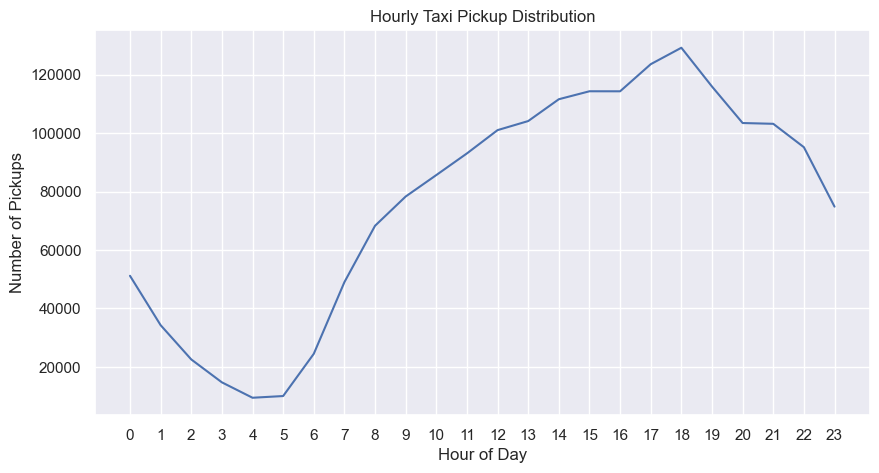

In [31]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values)
plt.title("Hourly Taxi Pickup Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)



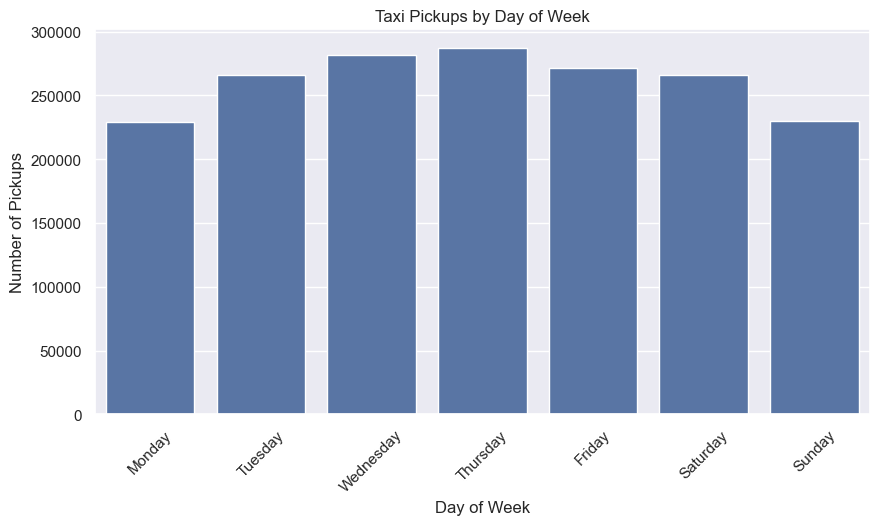

In [34]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = df['pickup_day'].value_counts().reindex(day_order)
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)
plt.title("Taxi Pickups by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Show the monthly trends in pickups



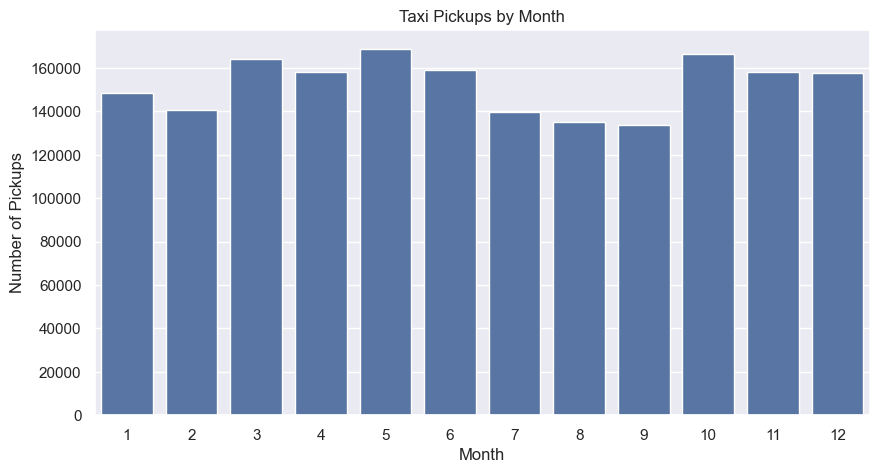

In [34]:
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_pickups = df['pickup_month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.title("Taxi Pickups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters



In [35]:
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[financial_cols].describe()

,fare_amount,tip_amount,total_amount,trip_distance
count,1.831391e+06,1.831391e+06,1.831391e+06,1.831391e+06
mean,1.945962e+01,3.573526e+00,2.857017e+01,3.444838e+00
std,1.657959e+01,4.069437e+00,2.120596e+01,4.545772e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.300000e+00,1.000000e+00,1.596000e+01,1.050000e+00
50%,1.350000e+01,2.860000e+00,2.100000e+01,1.780000e+00
75%,2.190000e+01,4.450000e+00,3.070000e+01,3.370000e+00
max,7.790000e+01,2.230800e+02,1.041600e+02,2.048600e+02


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.



In [36]:
financial_df = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0)
].copy()
print("Original rows:", df.shape[0])
print("Filtered rows:", financial_df.shape[0])

Original rows: 1831391
Filtered rows: 1830816


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue



In [37]:
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')
monthly_revenue = (
    df.groupby('pickup_month')['total_amount']
       .sum()
       .reset_index()
)
monthly_revenue

,pickup_month,total_amount
0,2022-12,13.50
1,2023-01,4025351.28
2,2023-02,3803060.97
3,2023-03,4583308.24
4,2023-04,4495237.91
5,2023-05,4900655.33
6,2023-06,4604023.29
7,2023-07,4003437.39
8,2023-08,3901174.49
9,2023-09,3980590.24


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter



In [38]:
df_2023 = df[df['tpep_pickup_datetime'].dt.year == 2023]
df_2023['pickup_quarter'] = df_2023['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df_2023.groupby('pickup_quarter')['total_amount'].sum()
quarterly_revenue_pct = (quarterly_revenue / quarterly_revenue.sum()) * 100
quarterly_revenue_pct

pickup_quarter
2023Q1    23.721281
2023Q2    26.756642
2023Q3    22.715000
2023Q4    26.807077
Freq: Q-DEC, Name: total_amount, dtype: float64

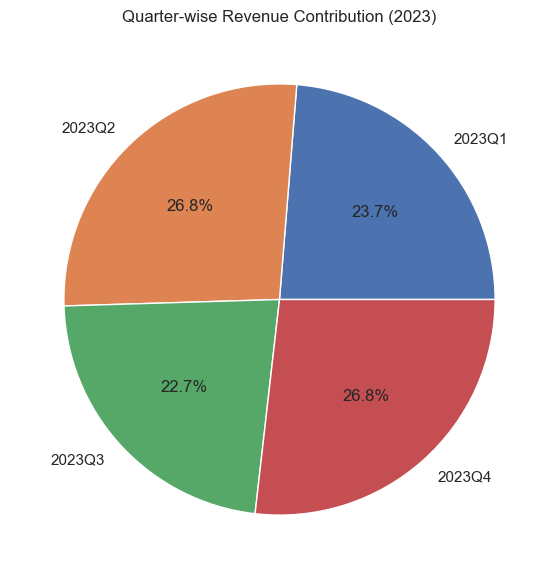

In [39]:
quarterly_revenue_pct.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(7,7),
    title='Quarter-wise Revenue Contribution (2023)'
)
plt.ylabel('')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance



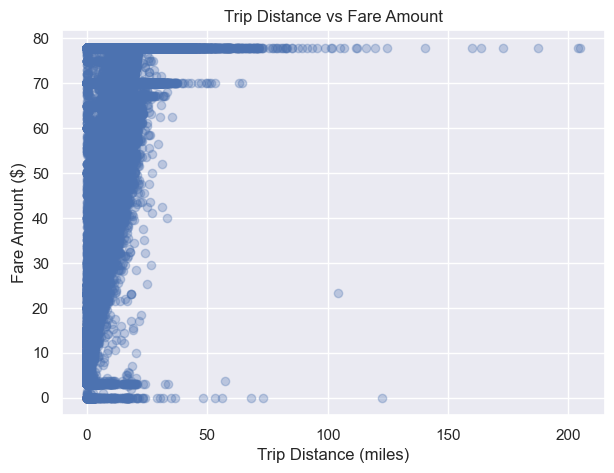

np.float64(0.9383226534802438)

In [42]:
df_dist_fare = df[df['trip_distance'] > 0]
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(
    df_dist_fare['trip_distance'],
    df_dist_fare['fare_amount'],
    alpha=0.3
)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs Fare Amount')
plt.show()
correlation = df_dist_fare['trip_distance'].corr(df_dist_fare['fare_amount'])
correlation

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration



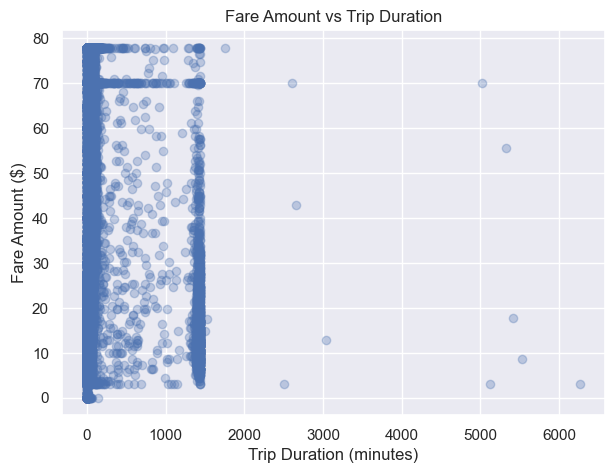

np.float64(0.27454376064642527)

In [43]:
df['trip_duration'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60
df = df[df['trip_duration'] > 0]
import matplotlib.pyplot as plt
df_fd = df[(df['fare_amount'] > 0) & (df['trip_duration'] > 0)]
plt.figure(figsize=(7,5))
plt.scatter(df_fd['trip_duration'], df_fd['fare_amount'], alpha=0.3)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Trip Duration')
plt.show()
df_fd['fare_amount'].corr(df_fd['trip_duration'])

In [ ]:
# Show relationship between fare and number of passengers



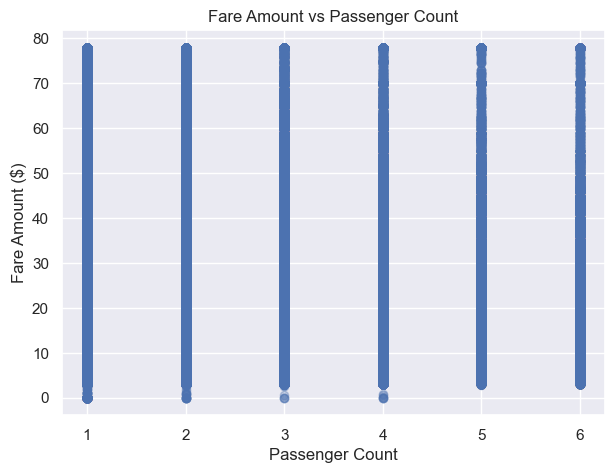

np.float64(0.04508901722165598)

In [44]:
df_fp = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
plt.figure(figsize=(7,5))
plt.scatter(df_fp['passenger_count'], df_fp['fare_amount'], alpha=0.3)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs Passenger Count')
plt.show()
df_fp['fare_amount'].corr(df_fp['passenger_count'])

In [ ]:
# Show relationship between tip and trip distance



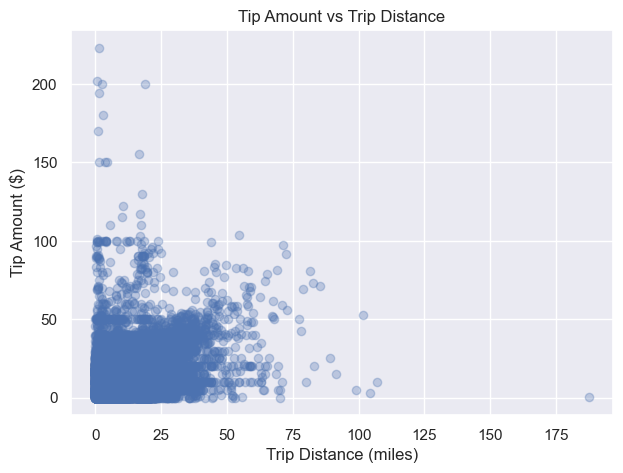

np.float64(0.798374008798117)

In [45]:
df_td =df[(df['trip_distance'] > 0) & (df['tip_amount'] > 0)]
plt.figure(figsize=(7,5))
plt.scatter(df_td['trip_distance'], df_td['tip_amount'], alpha=0.3)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Tip Amount vs Trip Distance')
plt.show()
df_td['tip_amount'].corr(df_td['trip_distance'])

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).




In [46]:
avg_fare_payment = (
    df.groupby('payment_type')['fare_amount']
    .mean()
    .reset_index()
)
avg_fare_payment

,payment_type,fare_amount
0,1,19.497049
1,2,19.411500
2,3,15.516136
3,4,18.915362


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

In [47]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = # read the .shp file using gpd
zones.head()

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
zones = gpd.read_file("C:\\Users\\hp\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

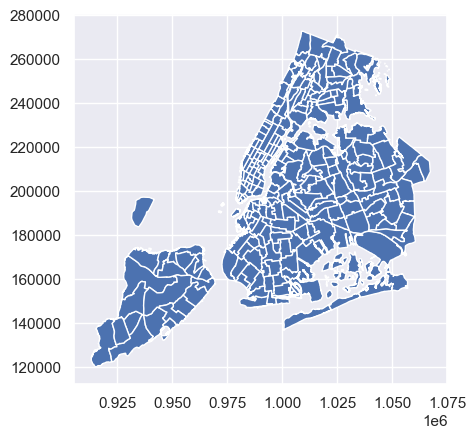

In [49]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID



In [50]:
zones_df = zones[['LocationID', 'zone', 'borough']]
gsdf = df.merge(
    zones_df,
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)
gsdf.rename(
    columns={
        'zone': 'PU_zone',
        'borough': 'PU_borough'
    },
    inplace=True
)
gsdf.drop(columns=['LocationID'], inplace=True)
gsdf[['PULocationID', 'PU_zone', 'PU_borough']].head()

,PULocationID,PU_zone,PU_borough
0,138,LaGuardia Airport,Queens
1,161,Midtown Center,Manhattan
2,237,Upper East Side South,Manhattan
3,143,Lincoln Square West,Manhattan
4,246,West Chelsea/Hudson Yards,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



In [51]:
trip_counts = (
    gsdf
    .groupby("PULocationID")
    .size()
    .reset_index(name="num_trips")
)
trip_counts.head()

,PULocationID,num_trips
0,1,213
1,2,2
2,3,40
3,4,1860
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame




In [52]:
zones = zones.merge(trip_counts, left_on="LocationID", right_on="PULocationID", how="left")
zones["num_trips"] = zones["num_trips"].fillna(0)
zones[["LocationID", "zone", "borough", "num_trips"]].head()

,LocationID,zone,borough,num_trips
0,1,Newark Airport,EWR,213.0
1,2,Jamaica Bay,Queens,2.0
2,3,Allerton/Pelham Gardens,Bronx,40.0
3,4,Alphabet City,Manhattan,1860.0
4,5,Arden Heights,Staten Island,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



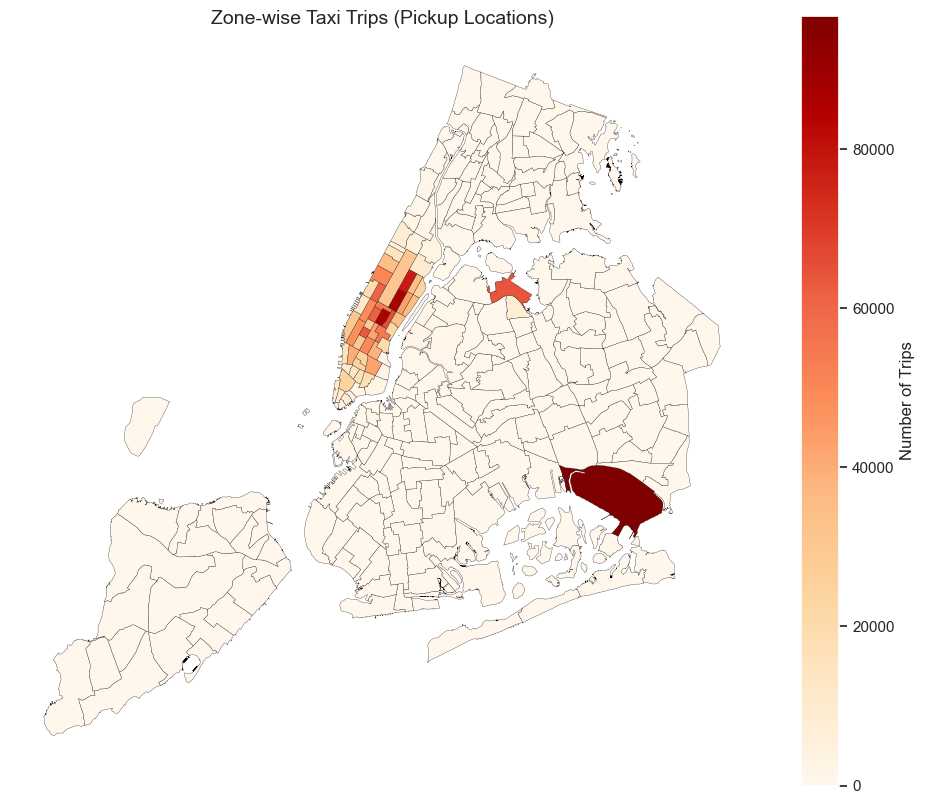

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(
    column="num_trips",
    ax=ax,
    cmap="OrRd",
    legend=True,
    legend_kwds={"label": "Number of Trips", "orientation": "vertical"},
    edgecolor="black",
    linewidth=0.2
)
ax.set_title("Zone-wise Taxi Trips (Pickup Locations)", fontsize=14)
ax.axis("off")
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



In [54]:
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "zone", "borough", "num_trips"]].head(10)

,LocationID,zone,borough,num_trips
131,132,JFK Airport,Queens,96770.0
236,237,Upper East Side South,Manhattan,86883.0
160,161,Midtown Center,Manhattan,85925.0
235,236,Upper East Side North,Manhattan,77503.0
161,162,Midtown East,Manhattan,65620.0
137,138,LaGuardia Airport,Queens,64162.0
185,186,Penn Station/Madison Sq West,Manhattan,63442.0
229,230,Times Sq/Theatre District,Manhattan,61294.0
141,142,Lincoln Square East,Manhattan,60866.0
169,170,Murray Hill,Manhattan,54478.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [55]:
#ANSWER TO THE FOLLOWING QUESTIONS 
#1.Busiest hours, days, and months
#Hourly trend: Taxi pickups peak during morning (8–10 AM) and evening (5–8 PM) hours.
#Day-wise trend: Weekdays show higher and more demand compared to weekends, with Friday being the busiest day.
#Monthly trend: Pickup volume is higher in late spring and summer months, which means more tourism.

#2.Trends in revenue collected
#Revenue closely follows pickup volume trends.
#Periods with higher trip counts show higher total revenue.
#Seasonal demand directly impacts total revenue generation.

#3.Trends in quarterly revenue
#Q2 and Q3 contribute the largest share of revenue.
#Q1 shows lower revenue, likely due to reduced travel in winter months.
#Quarterly analysis confirms a revenue pattern rather than random values.

#4.How fare depends on trip distance, trip duration, and passenger count
#Trip distance: Strong positive correlation — longer trips result in higher fares.
#Trip duration: Also positively correlated with fare, though slightly weaker due to traffic-related delays.
#Passenger count: Very weak correlation — fare is largely independent of the number of passengers.

#5.How tip amount depends on trip distance
#Tip amount shows a mild positive relationship with trip distance.
#Longer trips receive higher tips, but variability suggests tipping behavior also depends on passenger preference and payment method.

#6.Busiest zones
#Zones in Manhattan dominate trip volume.
#Airport zones(e.g., Newark Airport) also show high trip counts.
#Outer boroughs(Bronx, Queens, Staten Island) generally record fewer trips compared to Manhattan.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



In [56]:
route_df = gsdf[
    (gsdf["trip_distance"] > 0) &
    (gsdf["trip_duration"] > 0)
]
route_speed = (
    route_df
    .groupby(["PULocationID", "DOLocationID", "pickup_hour"])
    .agg(
        avg_distance=("trip_distance", "mean"),
        avg_duration=("trip_duration", "mean")
    )
    .reset_index()
)
route_speed["avg_speed"] = route_speed["avg_distance"] / route_speed["avg_duration"]
slow_routes = (
    route_speed
    .sort_values("avg_speed")
    .groupby("pickup_hour")
    .head(5)
)
slow_routes.head(10)

,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration,avg_speed
102294,232,65,13,0.490000,5522.433333,0.000089
114929,243,264,17,0.180000,1389.550000,0.000130
61252,142,142,5,0.560000,1413.550000,0.000396
120428,258,258,1,0.020000,45.750000,0.000437
33393,100,7,8,0.220000,334.433333,0.000658
6451,40,65,21,1.120000,1434.433333,0.000781
39490,113,235,22,0.280000,349.233333,0.000802
89226,194,194,16,0.010000,12.266667,0.000815
95261,226,145,18,1.563333,1810.761111,0.000863
9705,45,45,10,0.050000,50.433333,0.000991


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



In [57]:
# Number of trips per hour
trips_per_hour = gsdf.groupby("pickup_hour").size().reset_index(name="num_trips")
trips_per_hour.head()
busiest_hour = trips_per_hour.loc[trips_per_hour["num_trips"].idxmax()]
busiest_hour
print(
    f"Busiest hour: {busiest_hour['pickup_hour']} | "
    f"Number of trips: {busiest_hour['num_trips']}"
)

Busiest hour: 18 | Number of trips: 129156


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



In [58]:
sample_fraction = 0.05
top_5_hours = (
    trips_per_hour
    .sort_values("num_trips", ascending=False)
    .head(5)
)
top_5_hours["actual_trips"] = top_5_hours["num_trips"] / sample_fraction
top_5_hours

,pickup_hour,num_trips,actual_trips
18,18,129156,2583120.0
17,17,123523,2470460.0
19,19,115892,2317840.0
15,15,114260,2285200.0
16,16,114258,2285160.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



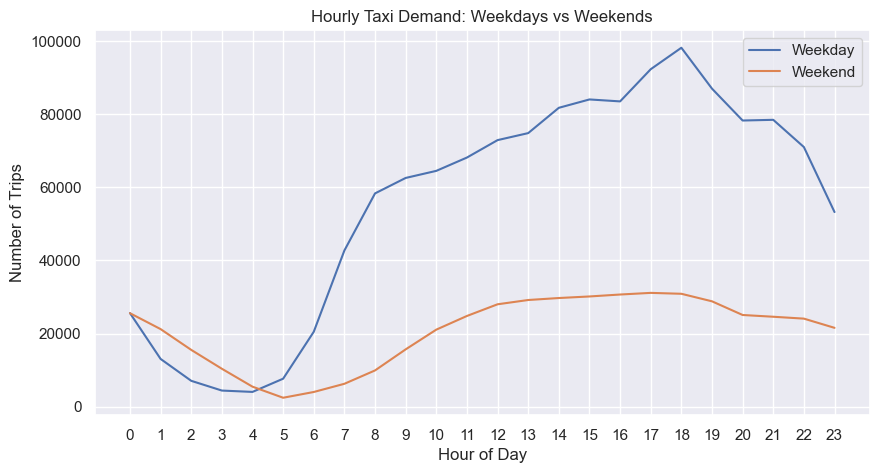

In [59]:
gsdf["day_type"] = gsdf["tpep_pickup_datetime"].dt.weekday.apply(
    lambda x: "Weekday" if x < 5 else "Weekend"
)
hourly_daytype = (
    gsdf.groupby(["day_type", "pickup_hour"])
    .size()
    .reset_index(name="num_trips")
)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for d_type in ["Weekday", "Weekend"]:
    subset = hourly_daytype[hourly_daytype["day_type"] == d_type]
    plt.plot(subset["pickup_hour"], subset["num_trips"], label=d_type)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Demand: Weekdays vs Weekends")
plt.xticks(range(0, 24))
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [ ]:
#we can say that on week days the taxi demand is high and on weekends the demand is low by the hours of the day 

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



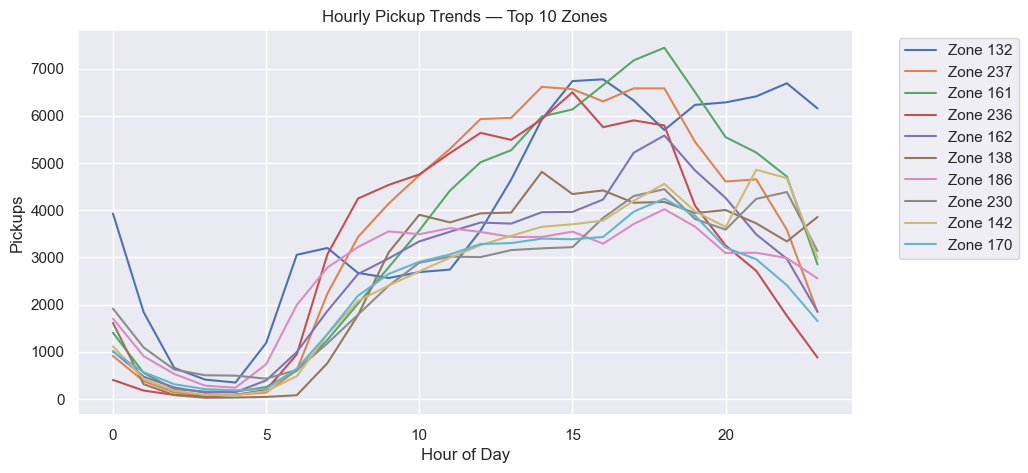

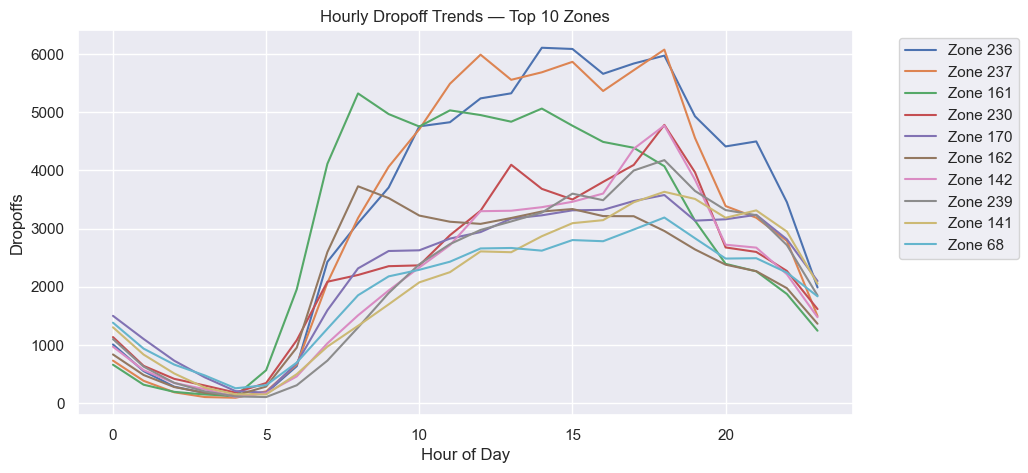

In [60]:
pickup_hourly = (
    gsdf.groupby(["PULocationID", "pickup_hour"])
    .size()
    .reset_index(name="pickup_count")
)
top_10_pickup_zones = (
    pickup_hourly.groupby("PULocationID")["pickup_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
dropoff_hourly = (
    gsdf.groupby(["DOLocationID", "pickup_hour"])
    .size()
    .reset_index(name="dropoff_count")
)

top_10_dropoff_zones = (
    dropoff_hourly.groupby("DOLocationID")["dropoff_count"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for z in top_10_pickup_zones:
    data = pickup_hourly[pickup_hourly["PULocationID"] == z]
    plt.plot(data["pickup_hour"], data["pickup_count"], label=f"Zone {z}")
plt.xlabel("Hour of Day")
plt.ylabel("Pickups")
plt.title("Hourly Pickup Trends — Top 10 Zones")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
plt.figure(figsize=(10,5))
for z in top_10_dropoff_zones:
    data = dropoff_hourly[dropoff_hourly["DOLocationID"] == z]
    plt.plot(data["pickup_hour"], data["dropoff_count"], label=f"Zone {z}")
plt.xlabel("Hour of Day")
plt.ylabel("Dropoffs")
plt.title("Hourly Dropoff Trends — Top 10 Zones")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



In [61]:
pickup_counts = gsdf.groupby("PULocationID").size().reset_index(name="pickups")
dropoff_counts = gsdf.groupby("DOLocationID").size().reset_index(name="dropoffs")
zone_ratios = (
    pickup_counts
    .merge(dropoff_counts, left_on="PULocationID", right_on="DOLocationID", how="outer")
    .fillna(0)
)
zone_ratios["pickup_dropoff_ratio"] = zone_ratios["pickups"] / (zone_ratios["dropoffs"] + 1)
zone_ratios.sort_values(
    "pickup_dropoff_ratio", ascending=False
).head(10)
zone_ratios.sort_values(
    "pickup_dropoff_ratio", ascending=True
).head(10)

,PULocationID,pickups,DOLocationID,dropoffs,pickup_dropoff_ratio
98,0.0,0.0,99.0,3.0,0.000000
171,0.0,0.0,176.0,12.0,0.000000
29,0.0,0.0,30.0,18.0,0.000000
240,0.0,0.0,245.0,30.0,0.000000
26,27.0,1.0,27.0,39.0,0.025000
216,221.0,1.0,221.0,34.0,0.028571
252,257.0,28.0,257.0,758.0,0.036891
0,1.0,213.0,1.0,5319.0,0.040038
110,115.0,1.0,115.0,23.0,0.041667
193,198.0,51.0,198.0,990.0,0.051463


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [62]:
night_hours = [23, 0, 1, 2, 3, 4, 5]
night_df = gsdf[gsdf["pickup_hour"].isin(night_hours)]
night_pickups = (
    night_df.groupby("PULocationID")
    .size()
    .sort_values(ascending=False)
    .head(10)
)
night_pickups
night_dropoffs = (
    night_df.groupby("DOLocationID")
    .size()
    .sort_values(ascending=False)
    .head(10)
)
night_dropoffs

DOLocationID
79     8314
48     6874
170    6264
68     5860
107    5756
141    5271
263    4976
249    4944
230    4643
148    4381
dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



In [63]:
night_revenue = night_df["total_amount"].sum()
day_df = gsdf[~gsdf["pickup_hour"].isin(night_hours)]
day_revenue = day_df["total_amount"].sum()
total_revenue = night_revenue + day_revenue
night_revenue_share = night_revenue / total_revenue * 100
day_revenue_share = day_revenue / total_revenue * 100
night_revenue_share, day_revenue_share

(np.float64(12.071262817918443), np.float64(87.92873718208155))

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




In [64]:
df_pp = gsdf[
    (gsdf["trip_distance"] > 0) &
    (gsdf["fare_amount"] > 0) &
    (gsdf["passenger_count"] > 0)
].copy()
df_pp["fare_per_mile"] = df_pp["fare_amount"] / df_pp["trip_distance"]
df_pp["fare_per_mile_per_passenger"] = (
    df_pp["fare_per_mile"] / df_pp["passenger_count"]
)
fare_per_passenger = (
    df_pp.groupby("passenger_count")["fare_per_mile_per_passenger"]
    .mean()
)
fare_per_passenger

passenger_count
1.0    10.728921
2.0     6.315342
3.0     3.815352
4.0     4.112088
5.0     1.702049
6.0     1.349637
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



In [65]:
gsdf["pickup_day"] = gsdf["tpep_pickup_datetime"].dt.dayofweek
df_fpm = gsdf[
    (gsdf["trip_distance"] > 0) &
    (gsdf["fare_amount"] > 0)
].copy()
df_fpm["fare_per_mile"] = df_fpm["fare_amount"] / df_fpm["trip_distance"]
fare_per_mile_hour = (
    df_fpm.groupby("pickup_hour")["fare_per_mile"]
    .mean()
)
fare_per_mile_hour
fare_per_mile_day = (
    df_fpm.groupby("pickup_day")["fare_per_mile"]
    .mean()
)
fare_per_mile_day

pickup_day
0    10.814804
1    11.169640
2    11.000342
3    11.083654
4    10.756017
5    10.652714
6    12.218629
Name: fare_per_mile, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



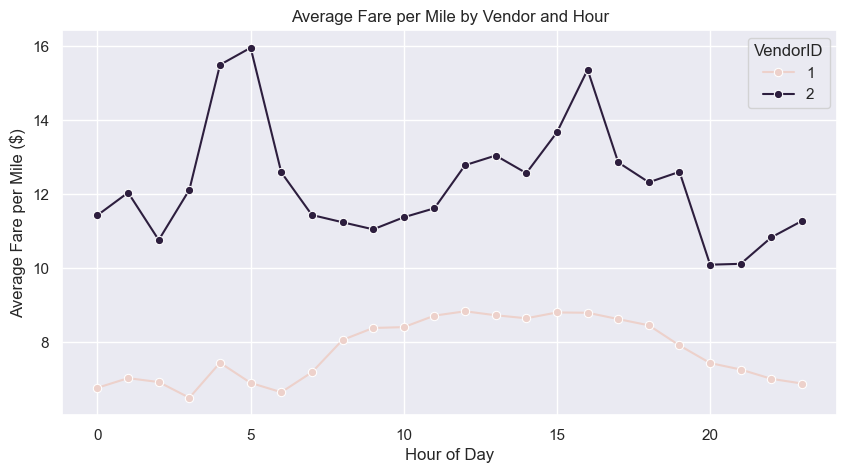

In [66]:
df_vendor = gsdf[
    (gsdf["trip_distance"] > 0) &
    (gsdf["fare_amount"] > 0)
].copy()
df_vendor["fare_per_mile"] = df_vendor["fare_amount"] / df_vendor["trip_distance"]
vendor_hour_fpm = (
    df_vendor
    .groupby(["VendorID", "pickup_hour"])["fare_per_mile"]
    .mean()
    .reset_index()
)
vendor_hour_fpm.head()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(
    data=vendor_hour_fpm,
    x="pickup_hour",
    y="fare_per_mile",
    hue="VendorID",
    marker="o"
)
plt.title("Average Fare per Mile by Vendor and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile ($)")
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



In [67]:
df_tier = gsdf[
    (gsdf["trip_distance"] > 0) &
    (gsdf["fare_amount"] > 0)
].copy()
df_tier["fare_per_mile"] = df_tier["fare_amount"] / df_tier["trip_distance"]
df_tier["distance_tier"] = pd.cut(
    df_tier["trip_distance"],
    bins=[0, 2, 5, float("inf")],
    labels=["<=2 miles", "2–5 miles", ">5 miles"]
)
tiered_fares = (
    df_tier
    .groupby(["VendorID", "distance_tier"])["fare_per_mile"]
    .mean()
    .reset_index()
)
tiered_fares

,VendorID,distance_tier,fare_per_mile
0,1,<=2 miles,9.909606
1,1,2–5 miles,6.379469
2,1,>5 miles,4.382755
3,2,<=2 miles,17.458907
4,2,2–5 miles,6.546970
5,2,>5 miles,4.446014


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



In [67]:
df_tip = gsdf[
    (gsdf["fare_amount"] > 0) &
    (gsdf["trip_distance"] > 0) &
    (gsdf["tip_amount"] >= 0)
].copy()
df_tip["tip_percentage"] = (df_tip["tip_amount"] / df_tip["fare_amount"]) * 100
df_tip["distance_bin"] = pd.cut(
    df_tip["trip_distance"],
    bins=[0, 2, 5, 10, float("inf")],
    labels=["0–2", "2–5", "5–10", "10+"]
)
tip_by_distance = (
    df_tip
    .groupby("distance_bin")["tip_percentage"]
    .mean()
    .reset_index()
)
tip_by_distance
tip_by_passenger = (
    df_tip
    .groupby("passenger_count")["tip_percentage"]
    .mean()
    .reset_index()
)
tip_by_passenger
tip_by_hour = (
    df_tip
    .groupby("pickup_hour")["tip_percentage"]
    .mean()
    .reset_index()
)
tip_by_hour

,pickup_hour,tip_percentage
0,0,20.542819
1,1,20.692628
2,2,20.678553
3,3,20.544137
4,4,18.324885
5,5,17.584598
6,6,18.521456
7,7,19.634660
8,8,20.075787
9,9,19.737859


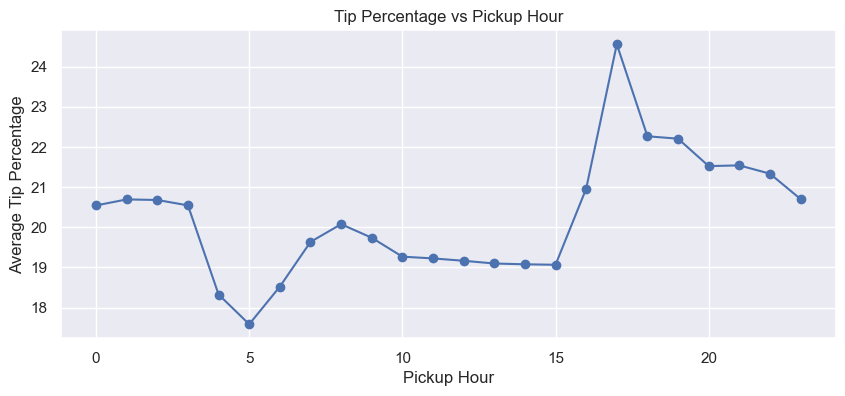

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(tip_by_hour["pickup_hour"], tip_by_hour["tip_percentage"], marker="o")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage vs Pickup Hour")
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



In [69]:
low_tip_trips = gsdf[
    (gsdf["fare_amount"] > 0) &
    (gsdf["tip_amount"] >= 0) &
    ((gsdf["tip_amount"] / gsdf["fare_amount"]) * 100 < 10)
]
high_tip_trips = gsdf[
    (gsdf["fare_amount"] > 0) &
    ((gsdf["tip_amount"] / gsdf["fare_amount"]) * 100 > 25)
]
comparison_summary = pd.DataFrame({
    "Metric": [
        "Average Trip Distance (miles)",
        "Average Fare Amount ($)",
        "Average Passenger Count",
        "Average Pickup Hour",
        "Average Trip Duration (min)"
    ],
    "Low Tip Trips": [
        low_tip_trips["trip_distance"].mean(),
        low_tip_trips["fare_amount"].mean(),
        low_tip_trips["passenger_count"].mean(),
        low_tip_trips["pickup_hour"].mean(),
        (low_tip_trips["trip_duration"] / 60).mean()
    ],
    "High Tip Trips": [
        high_tip_trips["trip_distance"].mean(),
        high_tip_trips["fare_amount"].mean(),
        high_tip_trips["passenger_count"].mean(),
        high_tip_trips["pickup_hour"].mean(),
        (high_tip_trips["trip_duration"] / 60).mean()
    ]
})
comparison_summary

,Metric,Low Tip Trips,High Tip Trips
0,Average Trip Distance (miles),3.775084,2.386499
1,Average Fare Amount ($),21.070502,14.691629
2,Average Passenger Count,1.407159,1.348732
3,Average Pickup Hour,13.909320,14.601135
4,Average Trip Duration (min),0.329651,0.214887


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




In [71]:
avg_passenger_by_hour = (
    gsdf.groupby("pickup_hour")["passenger_count"]
    .mean()
    .reset_index(name="avg_passenger_count")
)
avg_passenger_by_day = (
    gsdf.groupby("pickup_day")["passenger_count"]
    .mean()
    .reset_index(name="avg_passenger_count")
)
avg_passenger_by_hour, avg_passenger_by_day

(    pickup_hour  avg_passenger_count
 0             0             1.417201
 1             1             1.421126
 2             2             1.435618
 3             3             1.442956
 4             4             1.393149
 5             5             1.283433
 6             6             1.238091
 7             7             1.258612
 8             8             1.274518
 9             9             1.298166
 10           10             1.335693
 11           11             1.346935
 12           12             1.364043
 13           13             1.366453
 14           14             1.373782
 15           15             1.390898
 16           16             1.388988
 17           17             1.376149
 18           18             1.363119
 19           19             1.376566
 20           20             1.385222
 21           21             1.414088
 22           22             1.417945
 23           23             1.410511,
    pickup_day  avg_passenger_count
 0           

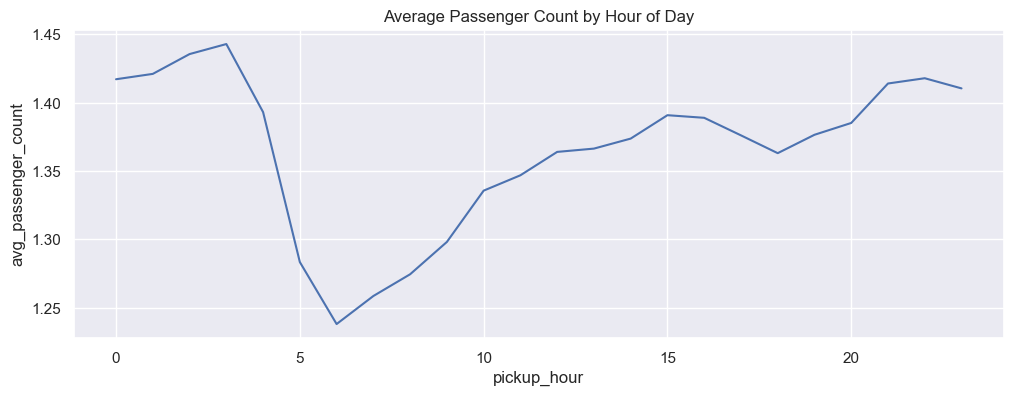

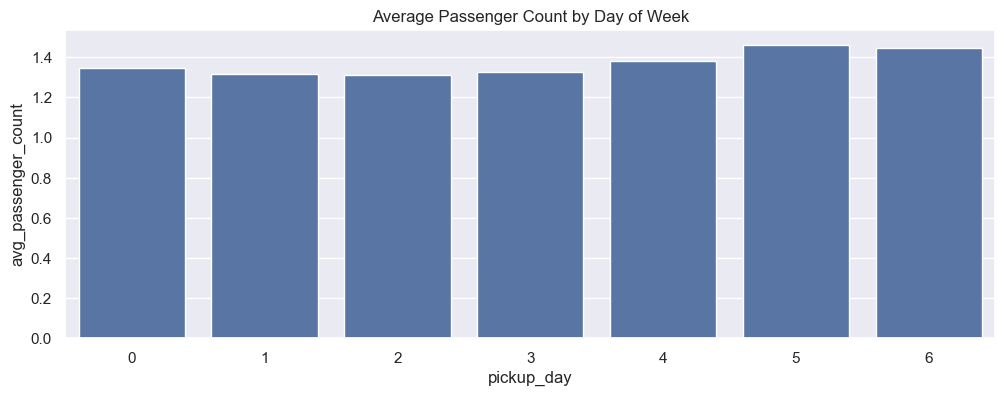

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
sns.lineplot(data=avg_passenger_by_hour, x="pickup_hour", y="avg_passenger_count")
plt.title("Average Passenger Count by Hour of Day")
plt.show()
plt.figure(figsize=(12,4))
sns.barplot(data=avg_passenger_by_day, x="pickup_day", y="avg_passenger_count")
plt.title("Average Passenger Count by Day of Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [69]:
avg_passenger_by_zone = (
    gsdf.groupby("PULocationID")["passenger_count"]
    .mean()
    .reset_index(name="avg_passenger_count")
)
zones_with_passengers = zones.merge(
    avg_passenger_by_zone,
    left_on="LocationID",
    right_on="PULocationID",
    how="left"
)
zones_with_passengers["avg_passenger_count"] = zones_with_passengers["avg_passenger_count"].fillna(0)
zones_with_passengers[["LocationID", "zone", "borough", "avg_passenger_count"]].head()

,LocationID,zone,borough,avg_passenger_count
0,1,Newark Airport,EWR,1.582160
1,2,Jamaica Bay,Queens,1.000000
2,3,Allerton/Pelham Gardens,Bronx,1.025000
3,4,Alphabet City,Manhattan,1.409677
4,5,Arden Heights,Staten Island,1.000000


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



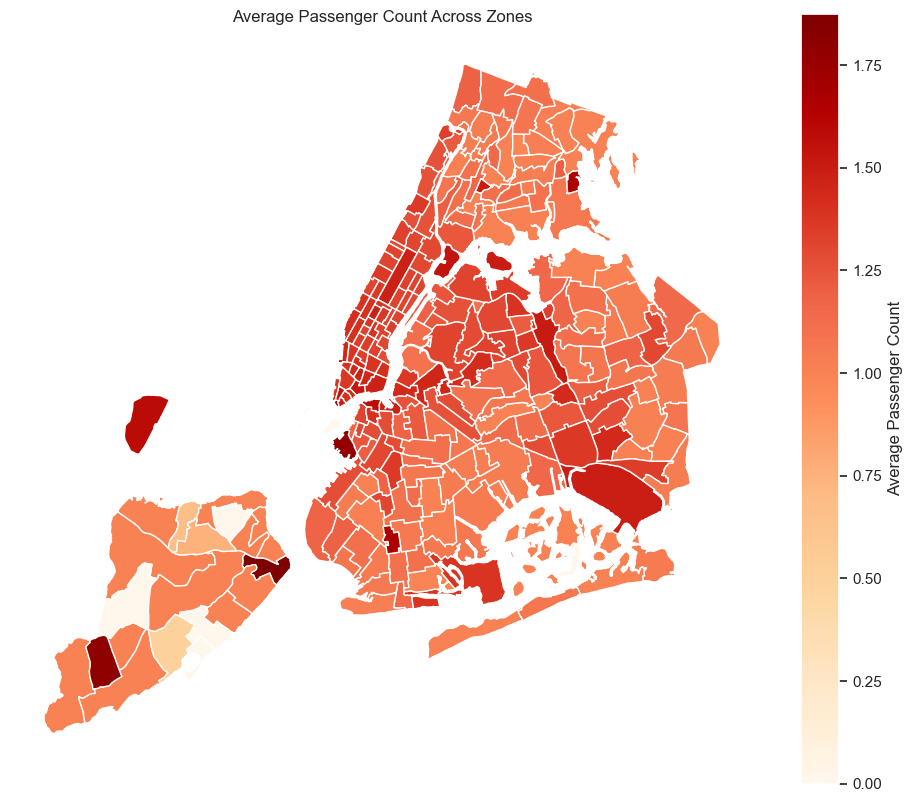

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
zones_with_passengers.plot(
    column="avg_passenger_count",
    ax=ax,
    legend=True,
    cmap="OrRd",
    legend_kwds={"label": "Average Passenger Count"}
)
plt.title("Average Passenger Count Across Zones")
plt.axis("off")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



In [72]:
surcharge_cols = [
    "extra",
    "mta_tax",
    "tolls_amount",
    "airport_fee",
    "congestion_surcharge"]
surcharge_frequency = (
    (gsdf[surcharge_cols] > 0)
    .mean()
    .reset_index(name="fraction_of_trips"))
surcharge_frequency
extra_by_hour = (
    gsdf.groupby("pickup_hour")["extra"]
    .apply(lambda x: (x > 0).mean())
    .reset_index(name="extra_charge_fraction"))
extra_by_hour
extra_by_zone = (
    gsdf.groupby("PULocationID")["extra"]
    .apply(lambda x: (x > 0).mean())
    .reset_index(name="extra_charge_fraction"))
extra_by_zone = extra_by_zone.merge(
    zones[["LocationID", "zone", "borough"]],
    left_on="PULocationID",
    right_on="LocationID",
    how="left")
extra_by_zone.sort_values("extra_charge_fraction", ascending=False).head(10)
airport_fee_by_zone = (
    gsdf.groupby("PULocationID")["airport_fee"]
    .apply(lambda x: (x > 0).mean())
    .reset_index(name="airport_fee_fraction"))
airport_fee_by_zone = airport_fee_by_zone.merge(
    zones[["LocationID", "zone"]],
    left_on="PULocationID",
    right_on="LocationID",
    how="left")
airport_fee_by_zone.sort_values("airport_fee_fraction", ascending=False).head(10)

,PULocationID,airport_fee_fraction,LocationID,zone
132,138,0.983355,138.0,LaGuardia Airport
126,132,0.933667,132.0,JFK Airport
69,70,0.665988,70.0,East Elmhurst
9,10,0.095652,10.0,Baisley Park
92,93,0.087855,93.0,Flushing Meadows-Corona Park
171,178,0.083333,178.0,Ocean Parkway South
123,129,0.072165,129.0,Jackson Heights
256,264,0.070991,NaN,NaN
208,215,0.070671,215.0,South Jamaica
124,130,0.050505,130.0,Jamaica


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

In [76]:
#The taxi data shows clear patterns. People take the most cabs during morning and evening rush hour, and late on weekends. Rides cost more during these busy and late-night times because of extra fees. The price is mostly based on how far and long the ride is, not how many people are in the car. People give better tips for longer, more expensive, or late-night trips. Almost all rides are in Manhattan, especially to airports or business areas. Rides are slower during rush hour traffic but faster at night. Finally, there are special charges for things like late-night rides, going to the airport, or driving in the busiest parts of the city.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [77]:
#To make the service better for everyone, we can adjust where taxis are based on the patterns we see. We should have more drivers available during the busiest times, like rush hours and weekend nights, so fewer people are left waiting. It also helps to have cabs ready in the busiest areas, like midtown Manhattan or near airports, so they can reach passengers faster. To avoid traffic jams, we can guide drivers away from historically slow routes during peak times. Late at night, we can focus on popular nightlife and airport zones. By predicting when and where demand will spike, we can keep more drivers busy and passengers happy.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [78]:
#To get taxis to riders faster, we should position our drivers more smartly based on the time and place. On weekday mornings and evenings, we need more cabs ready in busy business districts where people are commuting. On weekends and late at night, we should move more drivers towards popular nightlife spots, restaurants, and airports. The airports themselves need a steady stream of cabs all day, with extra focus on early mornings and late nights for flight arrivals. We can also plan for the busier travel months by having more cabs overall, and in slower months, just focus on the areas that are always busy. By constantly looking at real-time and past trip data, we can move idle cabs from quiet areas into nearby busy ones, keeping our drivers working and our passengers happy.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [79]:
#To make sure our pricing is fair but also effective, we can make small, smart adjustments. We can charge a bit more during the busiest times like rush hour or late at night, and slightly less during slower afternoon hours to attract more riders. For different trip lengths, we'll keep short rides very affordable for quick errands, while making sure pricing is efficient for longer trips where people often go to airports or suburbs. We could even offer a small discount for groups to make shared rides more appealing. We'll always check what competitors are charging to stay in line. Finally, since people tend to tip more on longer or late-night rides, we can make our tip suggestion in the app more prominent for those trips, helping drivers earn more without making the initial fare seem higher.